<a href="https://www.kaggle.com/code/bhavinmoriya/python-for-finance-financial-data-analysis?scriptVersionId=115252617" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

We shall do Chapter 6 of : https://www.amazon.com.br/Python-Finance-2e-Yves-Hilpisch/dp/1492024333

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas_datareader as web
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt, timedelta as td
sns.set()

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
start = dt.today() - td(days=5000)
dax = web.get_data_stooq('^DAX',start=start)
dax = dax.iloc[::-1] # for some reason it starts with end date so we revese
dax

,Open,High,Low,Close,Volume
Date,,,,,
2009-04-27,4625.41,4712.03,4571.54,4694.07,133281607.0
2009-04-28,4659.81,4661.20,4547.90,4607.42,139148006.0
2009-04-29,4617.01,4722.11,4611.54,4704.56,152123961.0
2009-04-30,4732.90,4837.05,4710.09,4769.45,184338126.0
2009-05-04,4790.03,4908.88,4781.97,4902.45,122411739.0
...,...,...,...,...,...
2022-12-23,13945.59,14000.68,13874.50,13940.93,NaN
2022-12-27,14047.42,14063.14,13966.35,13995.10,NaN
2022-12-28,14013.72,14018.47,13914.62,13925.60,NaN


In [3]:
dax.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3475 entries, 2009-04-27 to 2022-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3475 non-null   float64
 1   High    3475 non-null   float64
 2   Low     3475 non-null   float64
 3   Close   3475 non-null   float64
 4   Volume  2922 non-null   float64
dtypes: float64(5)
memory usage: 162.9 KB


In [4]:
dax.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2022-12-23,13945.59,14000.68,13874.50,13940.93,NaN
2022-12-27,14047.42,14063.14,13966.35,13995.10,NaN
2022-12-28,14013.72,14018.47,13914.62,13925.60,NaN
2022-12-29,13890.81,14071.72,13871.32,14071.72,NaN
2022-12-30,14005.84,14008.97,13922.55,13923.59,NaN


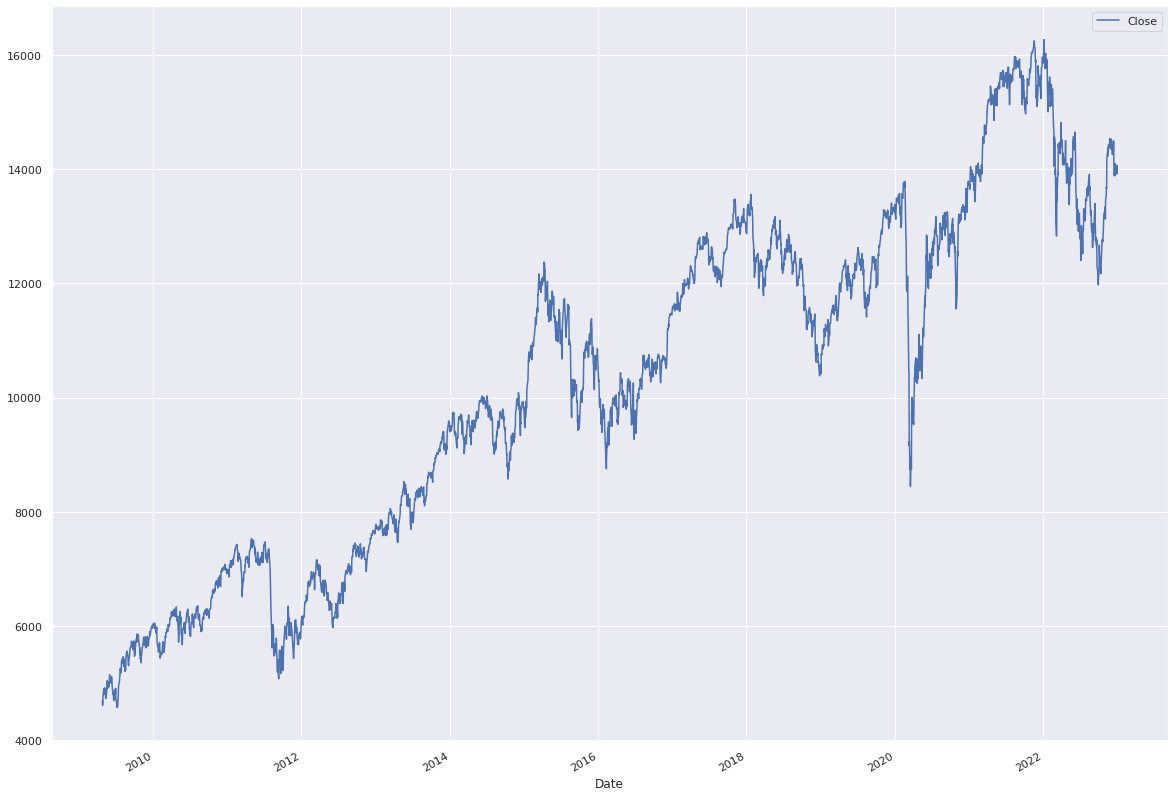

In [5]:
dax.Close.plot(figsize=(20,15),
              legend=True);

In [6]:
dax['log_ret'] = np.log(dax.Close / dax.Close.shift(1))

<AxesSubplot:xlabel='Date'>

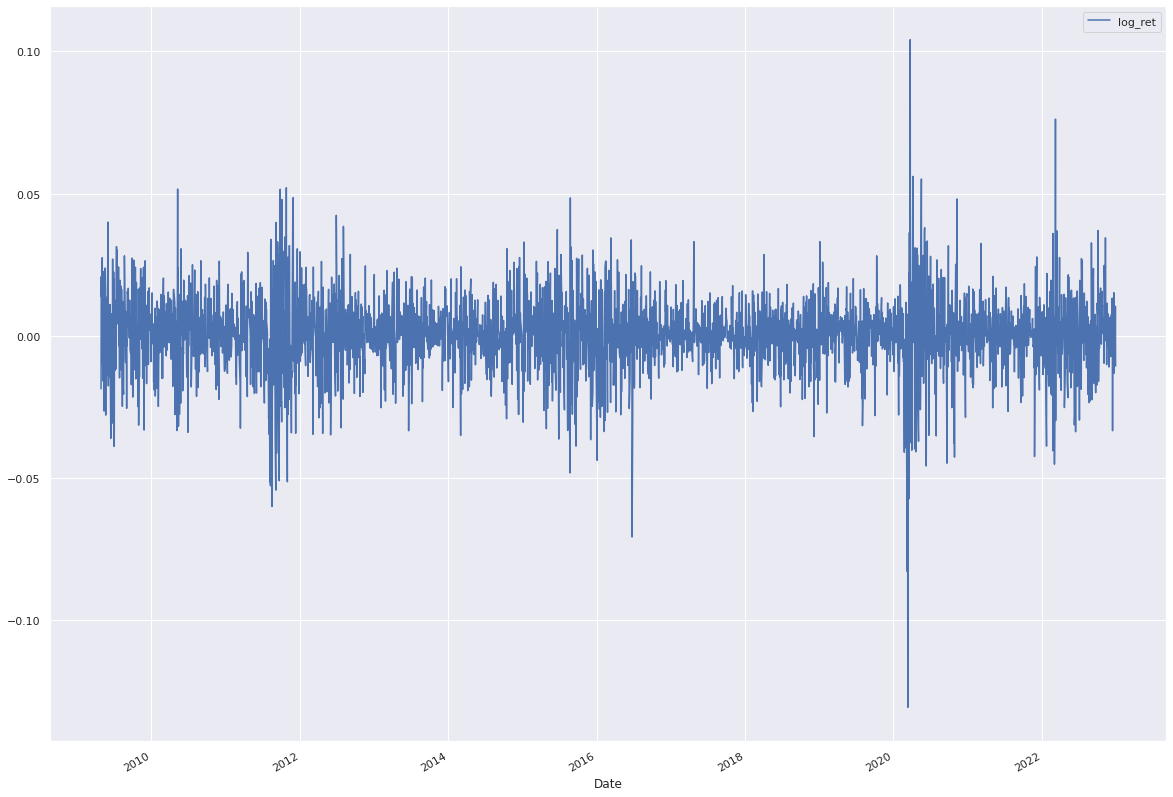

In [7]:
dax.log_ret.plot(figsize=(20,15),
                legend=True)

In [8]:
# rolling mean
dax['42d'] = dax['Close'].rolling(window=42).mean()
dax['252d'] = dax['Close'].rolling(window=252).mean()
dax.iloc[:,-3:]

,log_ret,42d,252d
Date,,,
2009-04-27,NaN,NaN,NaN
2009-04-28,-0.018632,NaN,NaN
2009-04-29,0.020864,NaN,NaN
2009-04-30,0.013699,NaN,NaN
2009-05-04,0.027504,NaN,NaN
...,...,...,...
2022-12-23,0.001929,14067.986429,13864.581706
2022-12-27,0.003878,14086.650000,13856.020159
2022-12-28,-0.004978,14102.894524,13846.710040


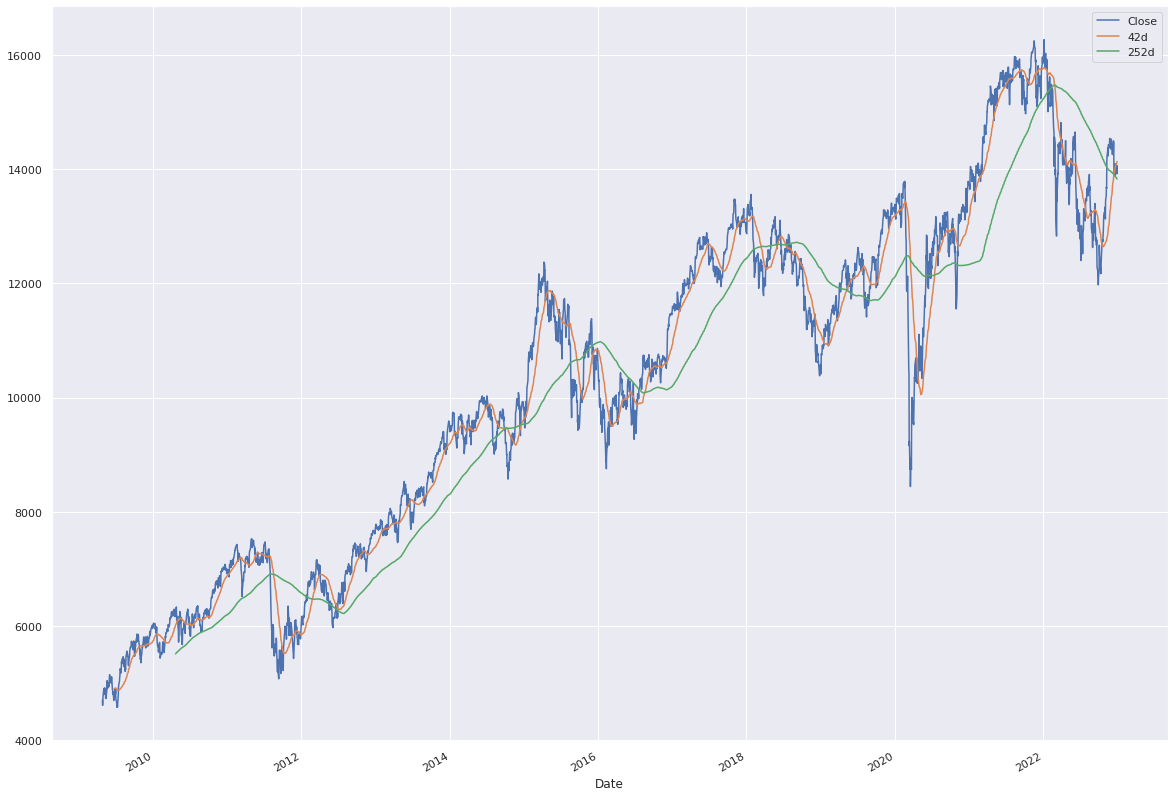

In [9]:
dax[['Close', '42d', '252d']].plot(figsize=(20, 15));

<AxesSubplot:xlabel='Date'>

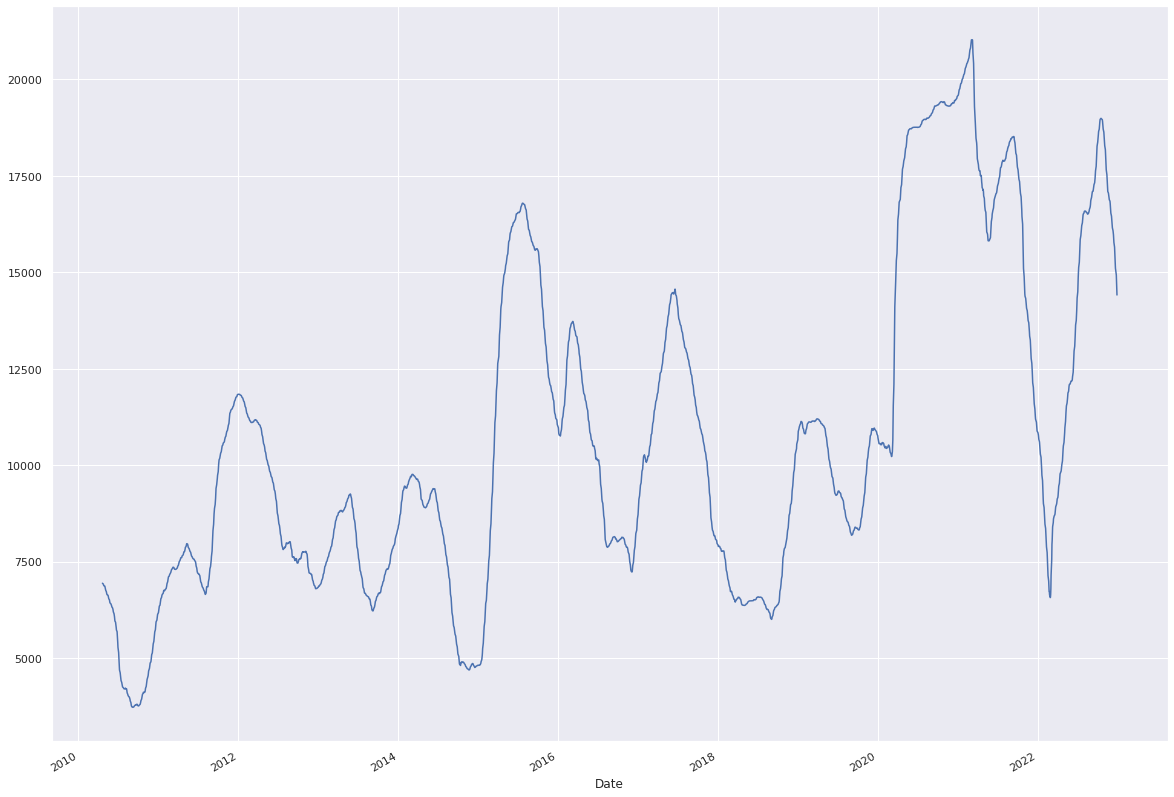

In [10]:
dax['Mov_Vol'] = dax.Close.rolling(252).std() * np.sqrt(252)
dax['Mov_Vol'].plot(figsize=(20,15))

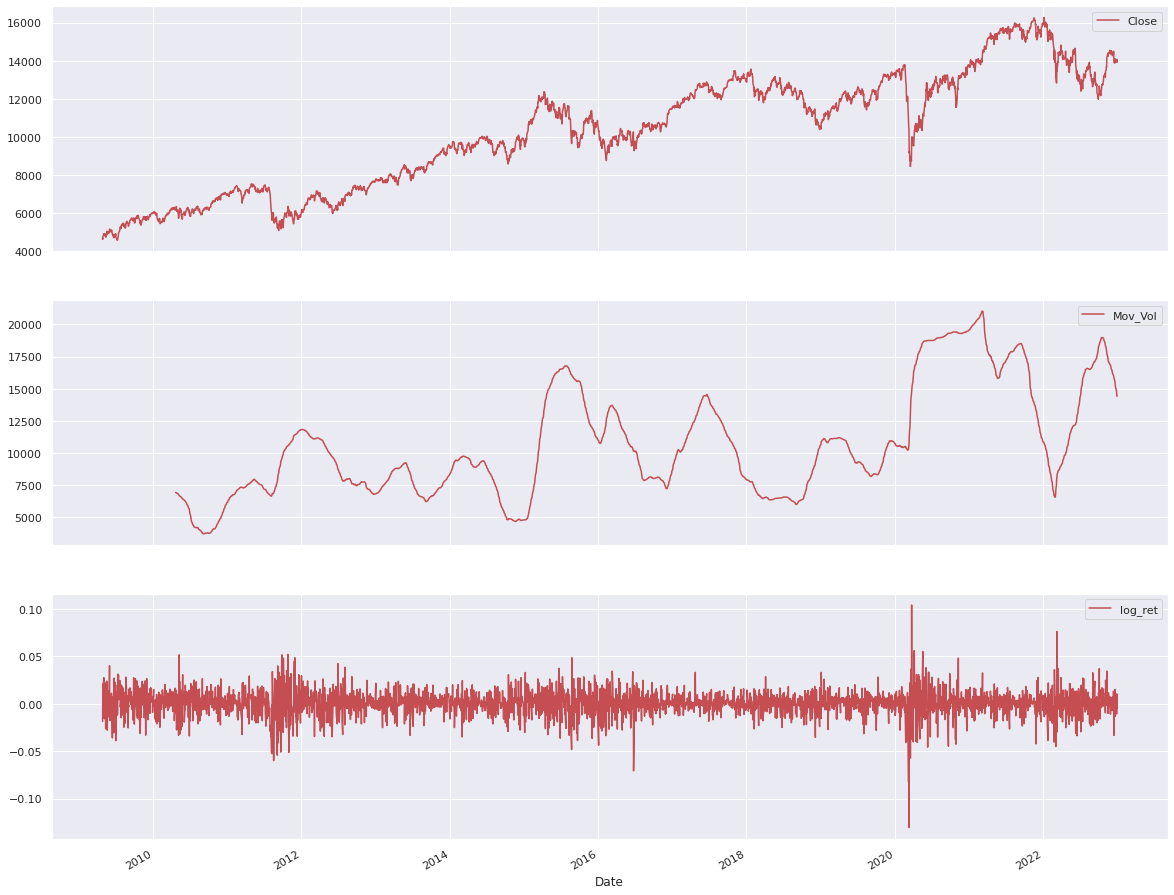

In [11]:
dax[['Close', 'Mov_Vol', 'log_ret']].plot(subplots=True, style='r',
figsize=(20, 17));

In [12]:
start

datetime.datetime(2009, 4, 25, 1, 38, 43, 982551)